### Posttest 6 Kecerdasan Buatan
### Nama : Aghnia Nurhidayah<br> NIM : 2209106020<br> Kelas : A1 22

In [19]:
import tensorflow as tf
from tensorflow.keras import Sequential, layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Import dataset

In [2]:
data = pd.read_csv('Bank Customer Churn Prediction.csv')
data

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Karena kolom 'customer_id' tidak digunakan, maka hapus kolom 'customer_id'

In [3]:
data.drop('customer_id', axis=1, inplace=True)

In [4]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Ubah nilai kategorikal pada kolom 'country' dan 'gender' menjadi numerik

In [5]:
encoder = LabelEncoder()
data['country'] = encoder.fit_transform(data['country'])
data['gender'] = encoder.fit_transform(data['gender'])

In [6]:
data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


Bagi kolom menjadi variabel x dan y. Variabel X berisi atribute selain label, yaitu 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'prodcts_number', 'credit_card', 'active_member', dan 'estimated_salary'. Dan pada variabel y akan berisi atribute labelnya yaitu 'churn'

Kemudian, lakukan transform data x dengan standard scaler.

In [7]:
scaler = StandardScaler()

X = data.iloc[:,:-1]
y = data.iloc[:,-1]

X = scaler.fit_transform(X)
X

array([[-0.32622142, -0.90188624, -1.09598752, ...,  0.64609167,
         0.97024255,  0.02188649],
       [-0.44003595,  1.51506738, -1.09598752, ..., -1.54776799,
         0.97024255,  0.21653375],
       [-1.53679418, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011,  0.2406869 ],
       ...,
       [ 0.60498839, -0.90188624, -1.09598752, ..., -1.54776799,
         0.97024255, -1.00864308],
       [ 1.25683526,  0.30659057,  0.91241915, ...,  0.64609167,
        -1.03067011, -0.12523071],
       [ 1.46377078, -0.90188624, -1.09598752, ...,  0.64609167,
        -1.03067011, -1.07636976]])

Split Data variabel X dan y menjadi X_train, X_test, y_train, dan y_test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
X_train.shape

(8000, 10)

Gunakan Sequential Model untuk training variabel x dengan input sebanyak 10 menggunakan activation relu

In [10]:
model = Sequential([
    layers.Dense(16, activation='relu', input_shape=[10]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
print(X_train.shape)
print(y_train.shape)

(8000, 10)
(8000,)


In [24]:
mf = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2887 - accuracy: 0.8764 - val_loss: 0.3758 - val_accuracy: 0.8525
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.8789 - val_loss: 0.3765 - val_accuracy: 0.8481
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2894 - accuracy: 0.8778 - val_loss: 0.3755 - val_accuracy: 0.8519
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.8794 - val_loss: 0.3809 - val_accuracy: 0.8550
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.8783 - val_loss: 0.3736 - val_accuracy: 0.8562
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2888 - accuracy: 0.8803 - val_loss: 0.3752 - val_accuracy: 0.8556
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2886 - accuracy: 0.8798 - val_loss: 0.3742 - val_accuracy: 0.8544

Epoch 58/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2830 - accuracy: 0.8792 - val_loss: 0.3832 - val_accuracy: 0.8456
Epoch 59/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.8791 - val_loss: 0.3811 - val_accuracy: 0.8494
Epoch 60/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2823 - accuracy: 0.8813 - val_loss: 0.3860 - val_accuracy: 0.8456
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.2836 - accuracy: 0.8786 - val_loss: 0.3982 - val_accuracy: 0.8319
Epoch 62/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2827 - accuracy: 0.8800 - val_loss: 0.3864 - val_accuracy: 0.8456
Epoch 63/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2832 - accuracy: 0.8825 - val_loss: 0.3827 - val_accuracy: 0.8519
Epoch 64/100
200/200 [==============================] - 1s 3ms/step - loss: 0.2822 - accuracy: 0.8836 - val_loss: 0.3890 - val_accuracy:

In [22]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8480


[0.3727542459964752, 0.8479999899864197]

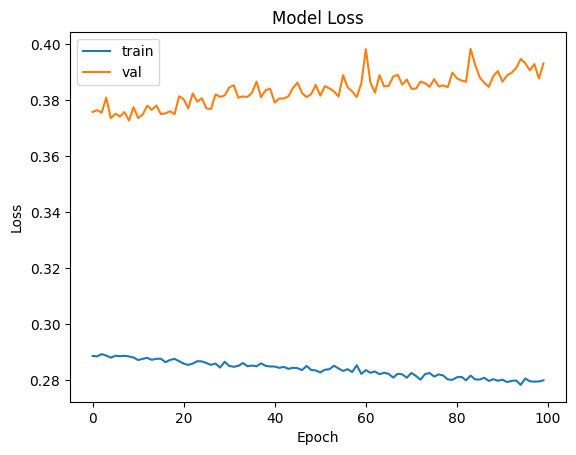

In [39]:
plt.plot(mf.history['loss'], label='train')
plt.plot(mf.history['val_loss'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

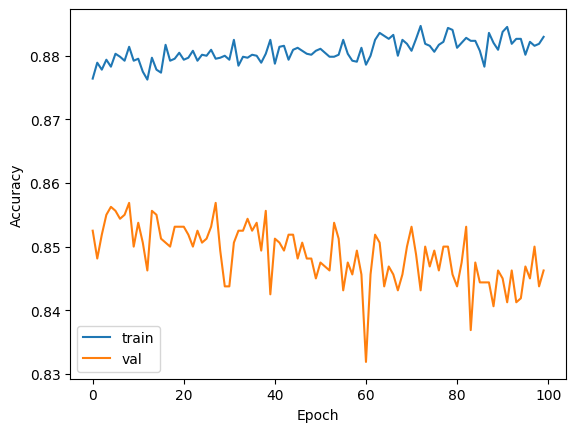

In [40]:
plt.plot(mf.history['accuracy'], label='train')
plt.plot(mf.history['val_accuracy'], label='val')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()